<a href="https://colab.research.google.com/github/raquelaoki/TryCatch2019/blob/master/TryCatchExercise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Try/CATCH 2019**
Raquel Aoki and Sachini Herath


Let's try out what we learnt so far on a new Dataset!

1. Understand the dataset and data formats
2. Load the data from the CSV into a DataFrame.
3. Check the dataset and correct data formats if necessary.
4. Convert string objects to date-time objects or numbers
5. Create plots to show interesting patterns.

---
There are two datasets available for you

### Bike Rental Analysis
Look at the bike renting patterns from a dataset obtained from a Bike Rental Company in Washington DC. </br>There are 2 data files, days.csv and hours.csv for this task, along with a README file describing the data format.</br>

### Avacado Prices
Look at Avacado prices in May of 2018, based on actual retail sales of Hass avocados. Do you see any interesting patterns? Can you predict future prices?
</br>There is one file containing data, avacado.csv and a README file describing data formats.

*Fun fact 1: We got these datasets from [Kaggle](https://www.kaggle.com), which is an online community of data scientists. It also hosts challanges that you can take part in!*

---





Let's start with the Avacado Prices dataset.

### 1. Loading Libraries


In [1]:
'''
Load neccessary libraries
'''

import pandas as pd             #dataset management
import numpy as np              #dataset management
import matplotlib.pyplot as plt #plot construction 
import re                       #data transformation 
import datetime                 #data transformation
from scipy import stats         #data science model 
%matplotlib inline
# INSERT CODE HERE

### Loading the dataset

Upload the .csv file to Files section in this notebook.

In [27]:
'''
Load the dataset from avacado.csv here
'''

data = pd.read_csv('bike_day.csv', parse_dates=[1])
data.shape # rows x columns 

# INSERT CODE HERE

(731, 16)

In [28]:
'''Check the first few rows of the dataset'''
# INSERT CODE HERE
print(data.head())


   instant     dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1 2011-01-01       1   0     1        0        6           0   
1        2 2011-01-02       1   0     1        0        0           0   
2        3 2011-01-03       1   0     1        0        1           1   
3        4 2011-01-04       1   0     1        0        2           1   
4        5 2011-01-05       1   0     1        0        3           1   

   weathersit      temp     atemp       hum  windspeed  casual  registered  \
0           2  0.344167  0.363625  0.805833   0.160446     331         654   
1           2  0.363478  0.353739  0.696087   0.248539     131         670   
2           1  0.196364  0.189405  0.437273   0.248309     120        1229   
3           1  0.200000  0.212122  0.590435   0.160296     108        1454   
4           1  0.226957  0.229270  0.436957   0.186900      82        1518   

    cnt  
0   985  
1   801  
2  1349  
3  1562  
4  1600  


In [29]:
''' Checking out a summary of data values'''
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
instant       731 non-null int64
dteday        731 non-null datetime64[ns]
season        731 non-null int64
yr            731 non-null int64
mnth          731 non-null int64
holiday       731 non-null int64
weekday       731 non-null int64
workingday    731 non-null int64
weathersit    731 non-null int64
temp          731 non-null float64
atemp         731 non-null float64
hum           731 non-null float64
windspeed     731 non-null float64
casual        731 non-null int64
registered    731 non-null int64
cnt           731 non-null int64
dtypes: datetime64[ns](1), float64(4), int64(11)
memory usage: 91.5 KB
None


### Pre_processing

Based on your task figure out if you need to extract data, convert columns to numbers or date_time and filter out values

In [36]:
'''Change date time to timestamp'''
# INSERT CODE HERE

data = data[data['dteday'].notnull()] 
print('New dataset size:', data.shape)

data['timestamp'] = data['dteday'].apply(lambda d: d.timestamp())

print('\n\nNew Dataset')
print(data.head())


New dataset size: (731, 17)


New Dataset
   instant     dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1 2011-01-01       1   0     1        0        6           0   
1        2 2011-01-02       1   0     1        0        0           0   
2        3 2011-01-03       1   0     1        0        1           1   
3        4 2011-01-04       1   0     1        0        2           1   
4        5 2011-01-05       1   0     1        0        3           1   

   weathersit      temp     atemp       hum  windspeed  casual  registered  \
0           2  0.344167  0.363625  0.805833   0.160446     331         654   
1           2  0.363478  0.353739  0.696087   0.248539     131         670   
2           1  0.196364  0.189405  0.437273   0.248309     120        1229   
3           1  0.200000  0.212122  0.590435   0.160296     108        1454   
4           1  0.226957  0.229270  0.436957   0.186900      82        1518   

    cnt     timestamp  
0   985  1.293840e+09  
1 

### Fitting a model
Let's look at how the Average Price changes with time.Find the Linear Regression model for the task you selected. 

In [38]:
''' Fit Linear Regression model to for date vs. temperature'''
# INSERT CODE HERE

fit = stats.linregress(data['timestamp'], data['temp'])
data['prediction'] = data['timestamp']*fit.slope + fit.intercept
fit.slope, fit.intercept

(1.5107858608143205e-09, -1.5069745325537487)

Let's try to predict the average price for today, using the trained model.

In [0]:
# Get the time stamp for today
import time
import datetime
s = "03/05/2019"
today_timestamp = time.mktime(datetime.datetime.strptime(s, "%d/%m/%Y").timetuple())


'''Calculate prediction for today using the trained model.'''
# INSERT CODE HERE


### Creating the graphic
Let's look at the price trend graphically. Plot the data and over fitted model in a graph against time.


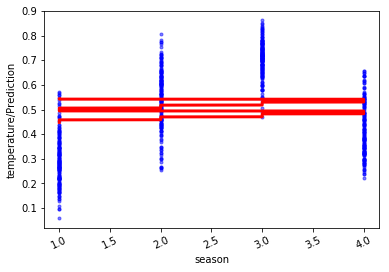

In [39]:
'''Plot graph'''
# INSERT CODE HERE
plt.xticks(rotation=25)
plt.plot(data['season'], data['temp'], 'b.', alpha=0.5)
plt.plot(data['season'], data['prediction'], 'r-', linewidth=3)
plt.xlabel('season')
plt.ylabel('temperature/Prediction')
plt.show()

### Avacado Problems!

Congratulations! You can now load a new dataset and perform interesting analysis.
Here are few questions you can find answers to, using this dataset.


1.  Does organic avacoda prices follow the same trend as above?
2.  How do the price trend differ according to the region?





---
## Challange

Now let's solve the mystery of Bike Rentals. 

</br>Take a look at the bike rental dataset and ffigure out an intersting problem to solve. Using one of the data files, figure out an intersting problem to solve.

</br> You may work in pairs.




### Selecting a Task
Here are some visualizations of the data that may help you select an interesting task to work on. (Replace the placeholders, A,B, with the suitable column names. Don't forget to change the titles and labels accordingly. )

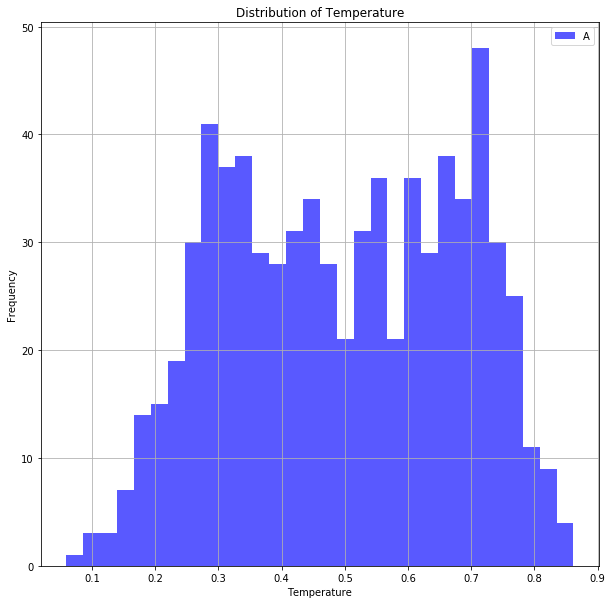

In [40]:
'''
Histogram
Find the distribution of values in a single columns
'''

# A = <column name>
data["temp"].plot(kind="hist",color="blue",bins=30,grid=True,alpha=0.65,label="A",figsize=(10,10))
plt.legend()
plt.xlabel("Temperature")
plt.title("Distribution of Temperature")
plt.show()

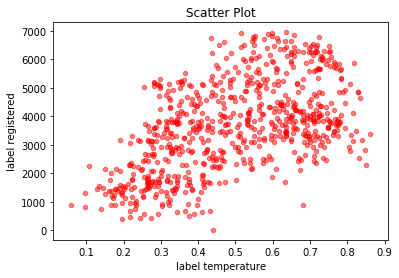

In [46]:
'''
Scatter plot
Correlation between A, B values 
'''

# A = <column name>
# B = <column name>
data.plot(kind="scatter", x="temp", y="registered", alpha=0.5, color="r")
plt.xlabel("label temperature")
plt.ylabel("label registered")
plt.title("Scatter Plot")
plt.show()

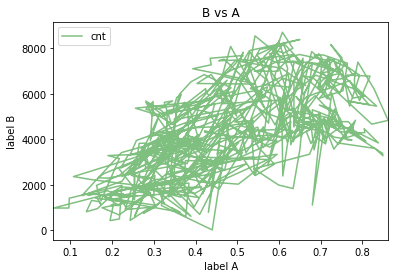

In [48]:
'''
Line Graph
Value of A against the series B
'''
# A = <column name>
# B = <column name>
data.plot(kind="line", x="temp", y="cnt", alpha=0.5, color="g")
plt.xlabel("label A")
plt.ylabel("label B")
plt.title("B vs A")
plt.show()